In [1]:
import torch
from utils import print_gpu_memory
print_gpu_memory()
import os
import sys
base_path = r"C:\Users\KAI\Coding\ThinkOnward_challenge\thinkOnward_TSClassification"
data_path = r"\data\building-instinct-starter-notebook\Starter notebook"
sys.path.append(base_path+data_path)
sys.path.append(base_path+"\kai")
import pandas as pd
from tqdm import tqdm
# from utils import (calculate_average_hourly_energy_consumption, train_model, get_pred, calculate_hierarchical_f1_score,
# sample_submission_generator)
from preprocessing import Preprocessor

load_filepath_labels = os.path.join(base_path + data_path,'building-instinct-train-label', 'train_label.parquet')#path to the train label file
df_targets = pd.read_parquet(load_filepath_labels, engine='pyarrow')
df_targets.sort_index(inplace=True)

Allocated memory: 0.00 GB
Cached memory: 0.00 GB
Total memory: 12.00 GB
Unused memory: 12.00 GB


In [2]:
df_targets_res = df_targets[df_targets.building_stock_type == "residential"].filter(like='_res').copy()
df_targets_com = df_targets[df_targets.building_stock_type == "commercial"].filter(like='_com').copy()

8.058823529411764
in.bedrooms_res


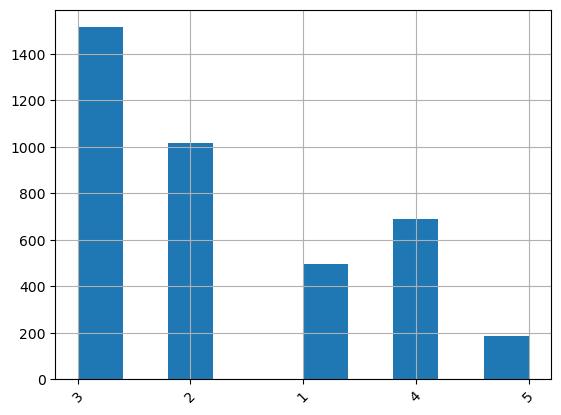

in.cooling_setpoint_res


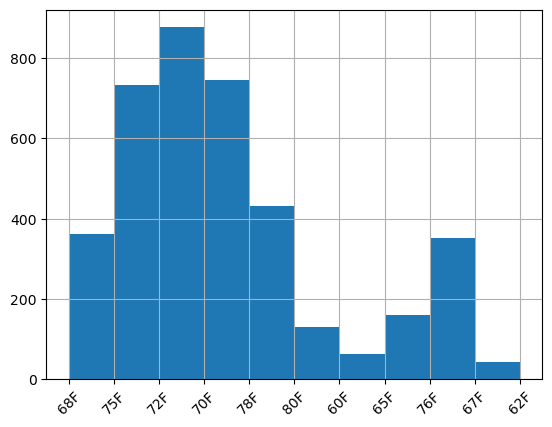

in.heating_setpoint_res


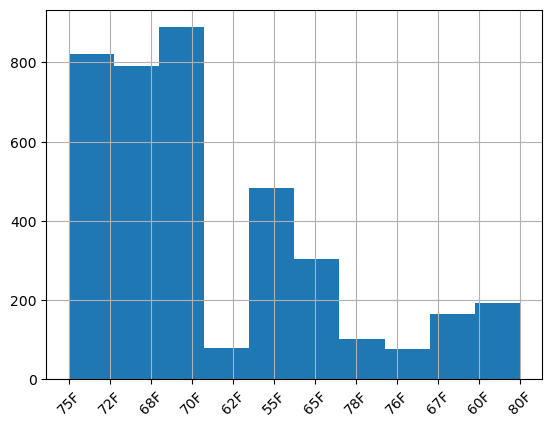

in.geometry_building_type_recs_res


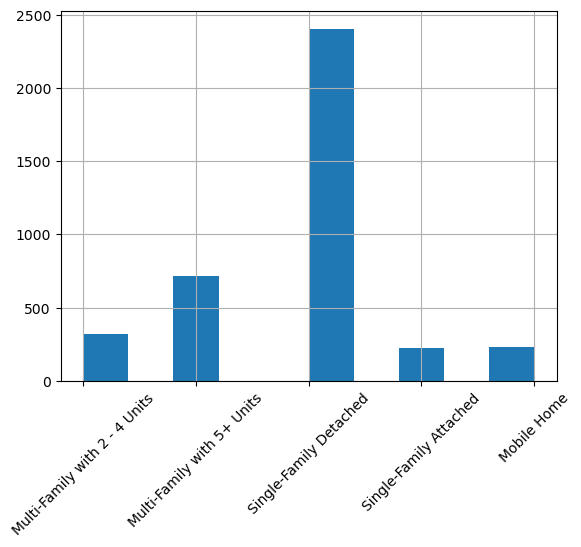

in.geometry_floor_area_res


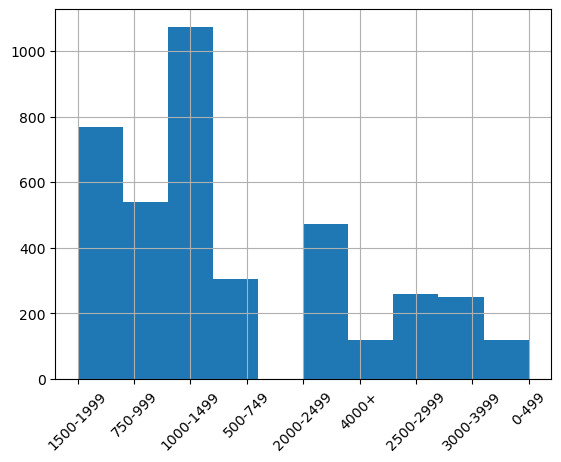

in.geometry_foundation_type_res


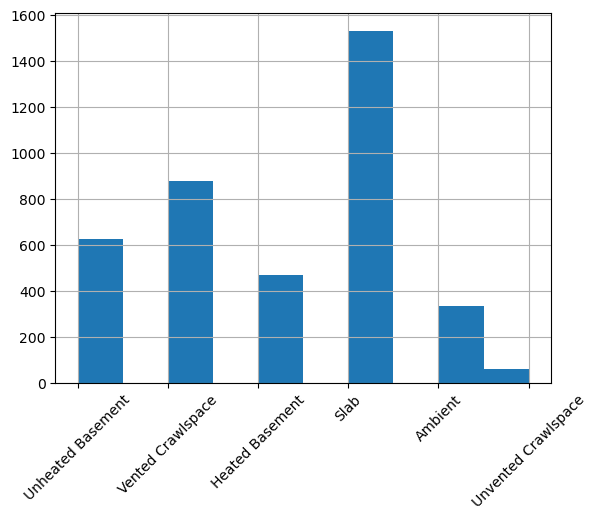

in.geometry_wall_type_res


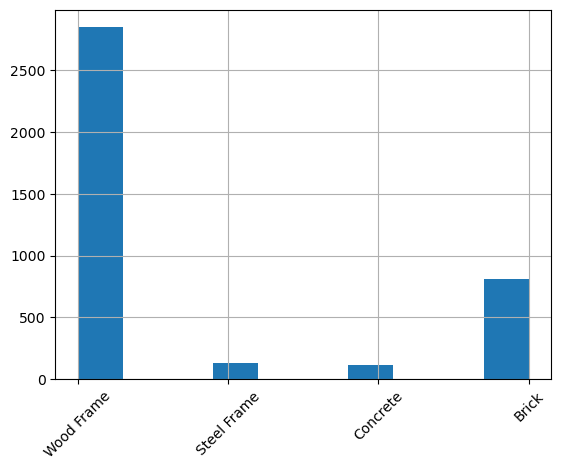

in.heating_fuel_res


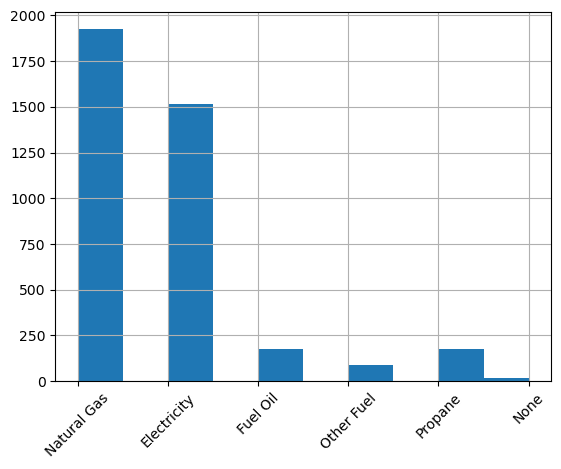

in.income_res


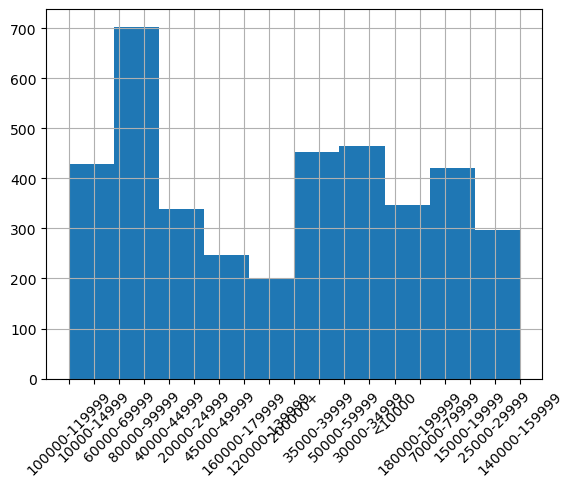

in.roof_material_res


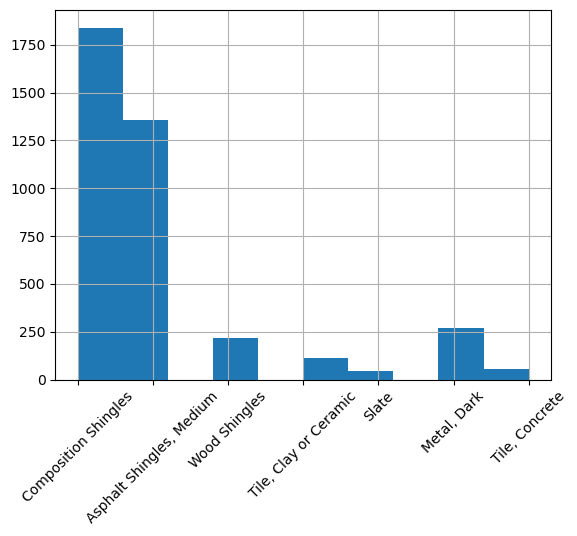

in.tenure_res


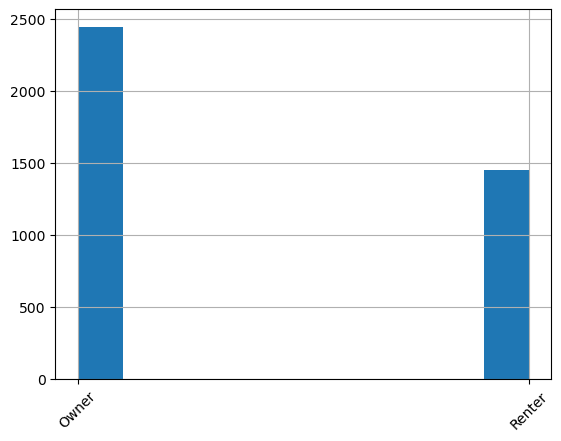

in.vacancy_status_res


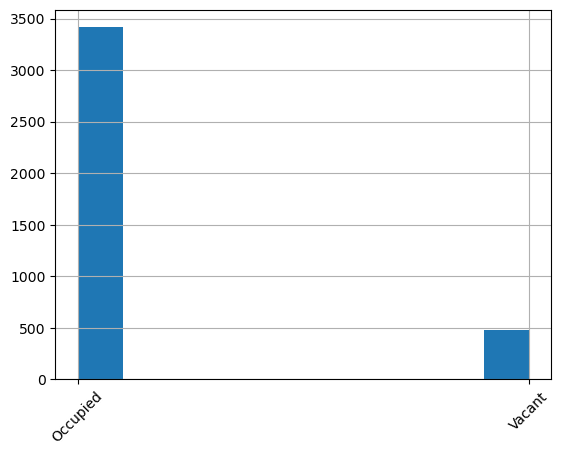

in.vintage_res


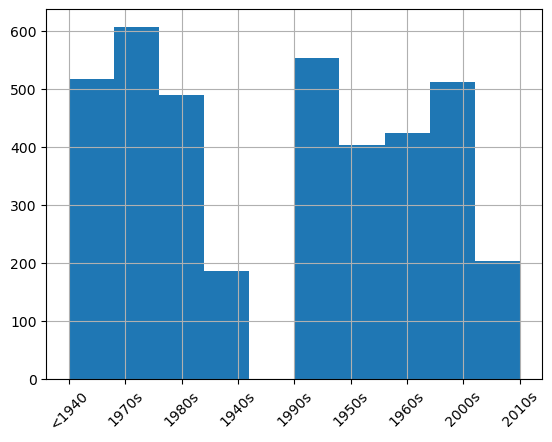

In [10]:
import matplotlib.pyplot as plt
for col in df_targets_res.columns:
    # create a histogramm for each column
    print(col)
    df_targets_res[col].hist()
    # rotate the label
    plt.xticks(rotation=45)
    plt.show()


in.comstock_building_type_group_com


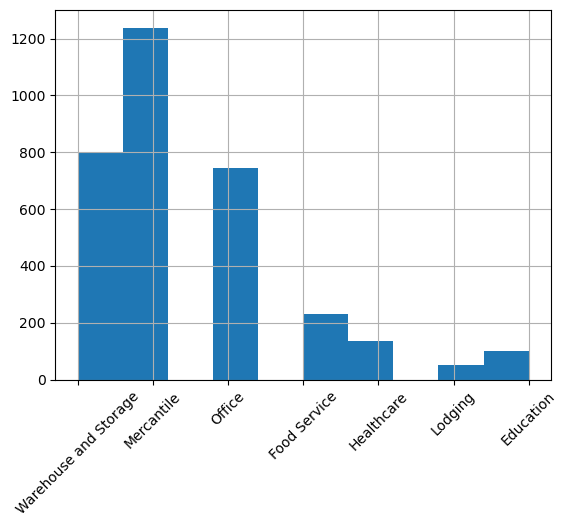

in.comstock_building_type_group_com
Mercantile               1239
Warehouse and Storage     797
Office                    745
Food Service              232
Healthcare                137
Education                  99
Lodging                    51
Name: count, dtype: int64
in.heating_fuel_com


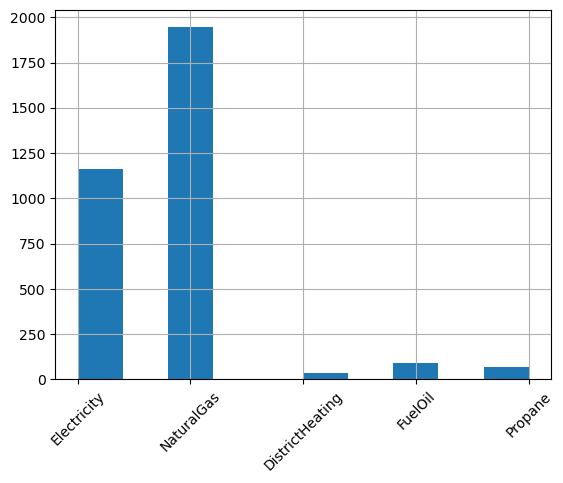

in.heating_fuel_com
NaturalGas         1944
Electricity        1162
FuelOil              89
Propane              69
DistrictHeating      36
Name: count, dtype: int64
in.hvac_category_com


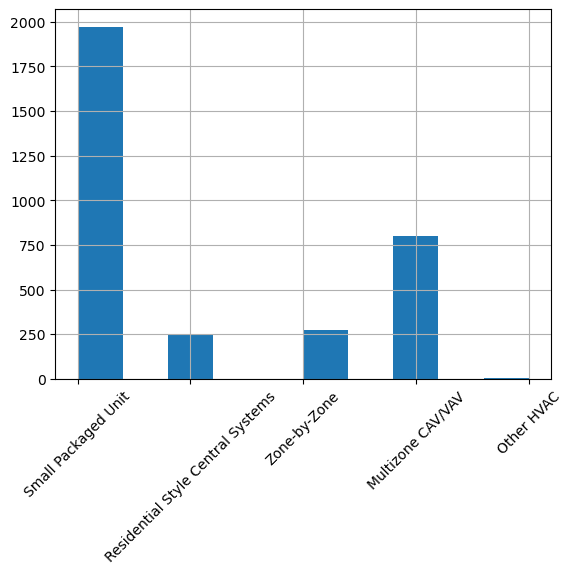

in.hvac_category_com
Small Packaged Unit                  1972
Multizone CAV/VAV                     800
Zone-by-Zone                          275
Residential Style Central Systems     249
Other HVAC                              4
Name: count, dtype: int64
in.number_of_stories_com


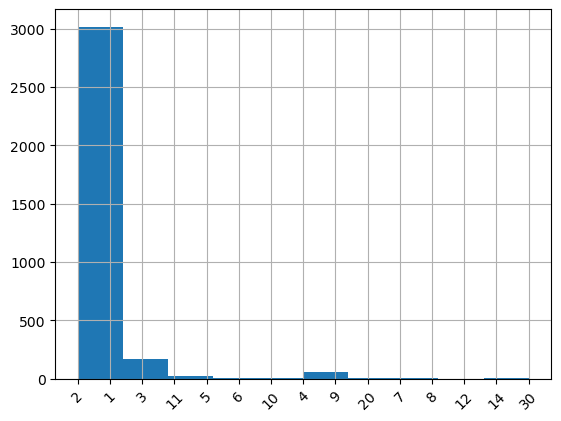

in.number_of_stories_com
1     2240
2      776
3      172
4       55
5       21
6        5
9        5
7        5
8        5
11       3
10       3
20       3
30       3
12       2
14       2
Name: count, dtype: int64
in.ownership_type_com


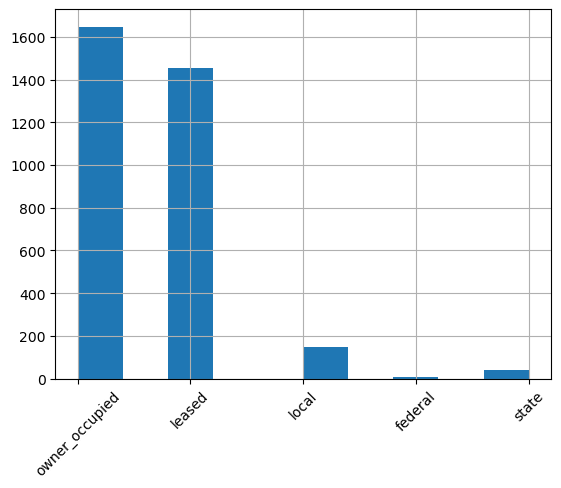

in.ownership_type_com
owner_occupied    1647
leased            1456
local              147
state               41
federal              9
Name: count, dtype: int64
in.vintage_com


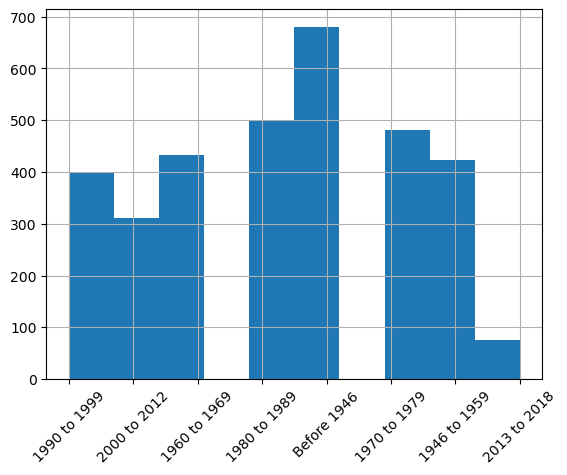

in.vintage_com
Before 1946     680
1980 to 1989    498
1970 to 1979    481
1960 to 1969    432
1946 to 1959    423
1990 to 1999    400
2000 to 2012    311
2013 to 2018     75
Name: count, dtype: int64
in.wall_construction_type_com


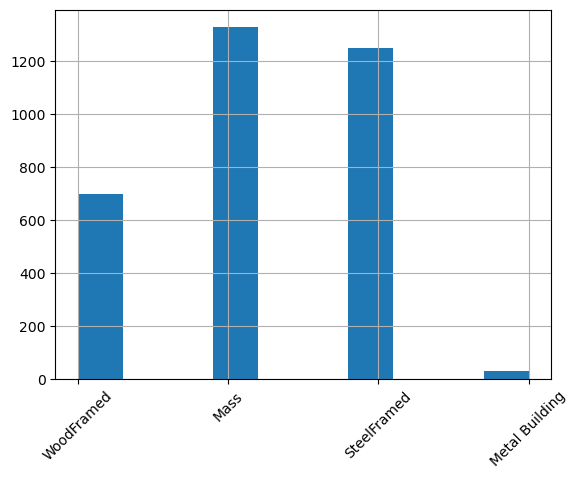

in.wall_construction_type_com
Mass              1326
SteelFramed       1247
WoodFramed         696
Metal Building      31
Name: count, dtype: int64
in.tstat_clg_sp_f..f_com


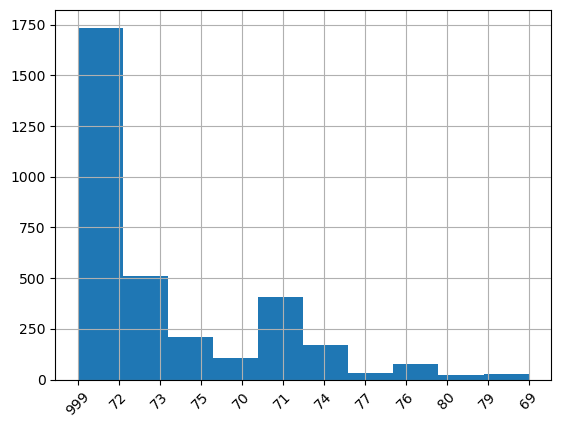

in.tstat_clg_sp_f..f_com
999    985
72     751
73     509
71     409
75     209
74     171
70     108
76      76
77      31
80      24
79      24
69       3
Name: count, dtype: int64
in.tstat_htg_sp_f..f_com


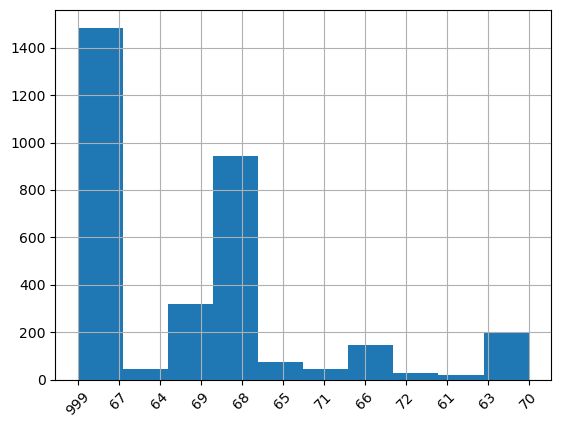

in.tstat_htg_sp_f..f_com
999    985
68     941
67     500
69     319
70     171
66     146
65      75
71      46
64      43
72      27
63      26
61      21
Name: count, dtype: int64
in.weekday_opening_time..hr_com


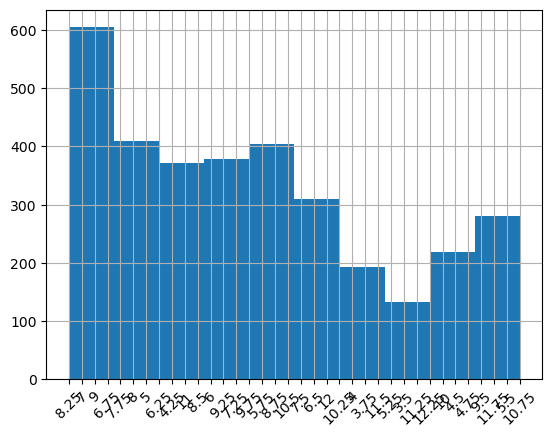

in.weekday_opening_time..hr_com
8        177
8.25     174
7.75     170
8.5      166
6.75     160
9.25     156
7        149
8.75     145
6.5      141
7.5      140
7.25     128
9        122
9.5      121
6.25     106
10       104
10.25     97
6         95
9.75      94
5.75      84
10.5      81
11        72
11.25     68
10.75     67
5.5       63
5         62
4.75      55
5.25      49
11.5      45
12.25     30
4.5       29
11.75     29
12        28
4.25      28
3.75      26
4         24
3.5       15
Name: count, dtype: int64
in.weekday_operating_hours..hr_com


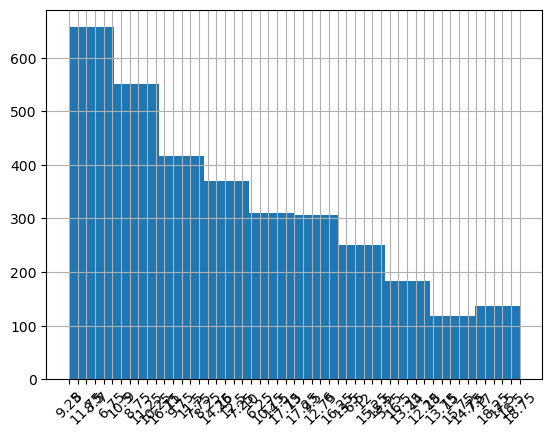

in.weekday_operating_hours..hr_com
8        151
7.25     137
9.25     136
8.75     136
9.75     132
9.5      132
8.25     131
9        131
8.5      129
7.75     121
10       116
10.25    112
7.5      108
7         90
11.25     88
10.75     87
6.75      85
10.5      84
11        81
6.5       75
11.5      67
11.75     66
6.25      65
12        65
13.5      58
6         53
12.5      51
12.25     47
5.75      47
12.75     45
13.25     43
13        43
13.75     38
14.5      34
14.25     34
14.75     32
15.25     31
14        30
15.5      22
16.25     21
15        20
15.75     20
16.5      17
16        17
16.75     16
17        13
17.25     12
18         8
17.75      8
18.5       6
18.25      4
17.5       4
18.75      1
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt
for col in df_targets_com.columns:
    #create a histogramm for each column
    print(col)
    df_targets_com[col].hist()
    # rotate the label
    plt.xticks(rotation=45)
    plt.show()
    print(df_targets_com[col].value_counts())
